In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
#전이학습에서 사용하게 될 라이브러리들 입니다. 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 #openCV -> pip install opencv-python / pip install cv2
import os 
import csv

from PIL import Image

In [4]:
# 미리 학습되어진 신경망 불러오기 

from tensorflow.keras.applications import MobileNetV2
#from tensorflow.keras.applications import VGG16
#from tensorflow.keras.applications import VGG19
#from tensorflow.keras.applications import Xception

# 함수형 방식의 신경망 구축 
from tensorflow.keras.layers import Input

In [5]:
from tensorflow.keras.applications import VGG16

vgg16 = VGG16()
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
mobile_v2 = MobileNetV2()
mobile_v2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [7]:
os.getcwd()

'C:\\Users\\shlee\\Desktop\\AI class\\딥러닝'

In [8]:
label_text = pd.read_csv('dataset/dogs/labels.csv')
print(label_text.head())
print(label_text.info())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB
None


In [9]:
label_text['breed'].nunique()

120

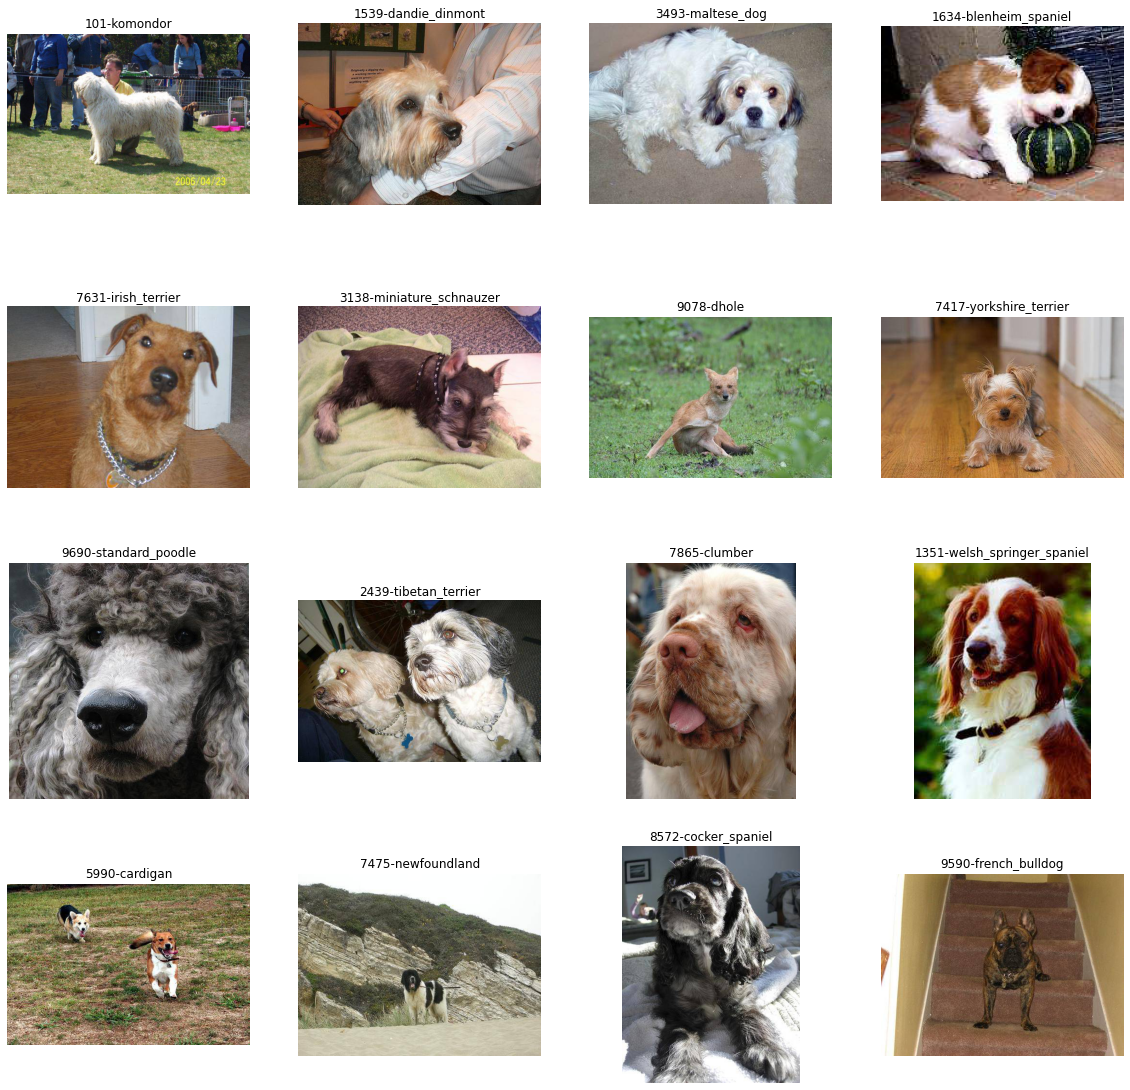

In [10]:
# 사진당 크기 
plt.figure(figsize=(20,20))

# 총 16장의 사진을 출력 
for i in range(16):

    # 가로 4개 세로 4개씩 하여 이미지를 출력합니다.
    plt.subplot(4,4,i+1)

    # 무작위 값을 주어 매번 다른 이미지가 출력되도록 합니다.
    i = np.random.choice(10222)

    #label_text 변수에 loc를 사용하여 
    # [i번 째 행,'id' 라는 열] 의 값을 할당합니다.
    image_id = label_text.loc[i, 'id']

    #절대경로 설정을 활용하여 사진 출력
    # 이미지 
    plt.imshow(plt.imread('dataset/dogs/train/' + image_id + '.jpg'))

    #사진과 함께 번호(i) + 제목 ( loc[i,'breed'] ) 출력
    plt.title(str(i) + '-' + label_text.loc[i, 'breed'])

    # 축 정보 표기 x
    plt.axis('off')

plt.show()

In [11]:
mobile_v2 = MobileNetV2()

In [12]:
# 계층의 학습을 제어하는 과정.
for layer in mobile_v2.layers[:-1]:
    layer.trainable = True

In [13]:
for layer in mobile_v2.layers[:-1]:
    if 'kernel' in layer.__dict__:
        
        kernel_shape = np.array(layer.get_weights()).shape
        
        layer.set_weights(np.random.normal(0,1,kernel_shape))

In [14]:
train_X = []

for i in range(len(label_text)): # 모든 이미지만큼 반복 수행
    #이미지 읽어들이기
    img = cv2.imread('dataset/dogs/train/' + label_text['id'][i] + '.jpg')
    img = cv2.resize(img, dsize=(224, 224)) # 이미지 크기 통일
    
    img = img / 255.0 # 이미지 크기 최소-최대 정규화
    #(이미지 크기 축소)
    
    train_X.append(img) # 빈 리스트에 학습 데이터 생성

train_X = np.array(train_X) # 학습 데이터를 array 타입으로 전환 

# 얻어진 학습 데이터의 shape 확인 
print(train_X.shape)

(10222, 224, 224, 3)


종속변수를 만들어 주는 과정(train_Y)

In [15]:
unique_Y = label_text['breed'].unique().tolist()
print(unique_Y)
print(len(unique_Y))

unique_Y.index('dingo')

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malino

1

In [16]:
train_y = [unique_Y.index(breed) for breed in label_text['breed']]

train_y = np.array(train_y)

print(len(train_y))
print(train_y)

10222
[ 0  1  2 ... 63 77 92]


In [17]:
# 마지막 계층의 이전계층을 변수화 한 과정
output_layer_2 = mobile_v2.layers[-2].output

# 출력 계층 정의
predictions = tf.keras.layers.Dense(units=120, activation='softmax')(output_layer_2)

# 함수형 방식으로 신경망 구축 
model = tf.keras.Model(inputs = mobile_v2.input, outputs = predictions)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [18]:
# 컴파일 과정
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
#텐서보드를 위한 log 폴더가 필요
log_dir = 'dataset\dogs\log'

In [20]:
#코드 돌리지 않는다
history = model.fit(train_X, train_y, 
                    epochs = 10,
                    batch_size =32,
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),
                                 tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq = 1)])


C:\Users\shlee\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/10
240/240 [==============================] - 604s 2s/step - loss: 4.9282 - accuracy: 0.0085 - val_loss: 8.8181 - val_accuracy: 0.0063
Epoch 2/10
240/240 [==============================] - 904s 4s/step - loss: 4.8223 - accuracy: 0.0123 - val_loss: 9.2974 - val_accuracy: 0.0059
Epoch 3/10
 33/240 [===>..........................] - ETA: 12:13 - loss: 4.7796 - accuracy: 0.0218

KeyboardInterrupt: 

In [21]:
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf

mobilev2        = MobileNetV2()
output_layer_2  = mobilev2.layers[-2].output
predictions     = tf.keras.layers.Dense(120, activation='softmax')(output_layer_2)

model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [22]:
for layer in model.layers[:-20]:
    layer.trainable = False

for layer in model.layers[-20:]:
    layer.trainable = True

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [24]:
model.compile(optimizer='sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
log_dir = 'dataset\dogs\log'

In [26]:
history = model.fit(train_X, train_y, 
                    epochs = 10,
                    batch_size =32,
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),
                                 tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq = 1)])

Epoch 1/10
240/240 [==============================] - 360s 1s/step - loss: 3.2544 - accuracy: 0.2874 - val_loss: 1.9699 - val_accuracy: 0.4707
Epoch 2/10
240/240 [==============================] - 330s 1s/step - loss: 1.6252 - accuracy: 0.6037 - val_loss: 1.5852 - val_accuracy: 0.5505
Epoch 3/10
240/240 [==============================] - 323s 1s/step - loss: 1.1870 - accuracy: 0.7064 - val_loss: 1.4617 - val_accuracy: 0.5853
Epoch 4/10
240/240 [==============================] - 314s 1s/step - loss: 0.9394 - accuracy: 0.7749 - val_loss: 1.4057 - val_accuracy: 0.5904
Epoch 5/10
240/240 [==============================] - 313s 1s/step - loss: 0.7605 - accuracy: 0.8295 - val_loss: 1.3598 - val_accuracy: 0.6017
Epoch 6/10
240/240 [==============================] - 218s 910ms/step - loss: 0.6308 - accuracy: 0.8716 - val_loss: 1.3380 - val_accuracy: 0.6158
Epoch 7/10
240/240 [==============================] - 195s 814ms/step - loss: 0.5300 - accuracy: 0.9011 - val_loss: 1.3000 - val_accuracy: 

In [27]:
model.save('dog_image_recognition.h5')

In [28]:
model1 = tf.keras.models.load_model('dog_image_recognition.h5')

In [29]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [30]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

Predict Prob : 
 [[0.5 0.2 0.3 0.5 1.9 1.1 0.2 0.1 0.8 0.9 0.3 1.2 0.7 1.3 0.1 1.2 0.7 0.1
  2.8 0.6 0.3 1.5 0.5 0.3 0.5 0.3 0.2 1.  3.4 0.6 2.2 0.3 0.9 0.1 0.3 0.2
  0.2 1.1 0.5 0.7 0.3 0.5 0.3 0.7 2.5 0.8 0.6 1.6 0.7 0.5 0.4 1.3 0.8 0.4
  0.3 1.4 2.4 0.5 0.7 2.4 0.6 0.7 1.6 0.9 0.1 0.1 0.5 0.7 0.6 0.4 2.2 1.
  0.2 0.5 0.7 0.3 0.2 0.6 0.7 2.1 0.4 0.1 0.4 1.7 0.7 1.  0.7 0.9 3.9 0.7
  4.4 0.7 1.3 0.4 1.2 2.  0.7 0.8 0.3 0.7 0.3 0.2 0.6 0.3 1.  0.7 0.6 1.4
  0.3 1.6 0.9 0.6 0.4 1.4 0.3 0.4 0.6 0.4 0.7 0.4]]
Model Predict : Index-90


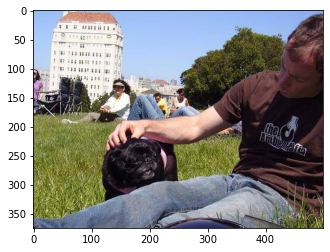

In [31]:
img = plt.imread('dataset/dogs/test/001510bc8570bbeee98c8d80c8a95ec1.jpg')
img = np.resize(img,(224,224,3))
img = img / 255.0
img = np.expand_dims(img, axis=0)

prob = model.predict(img)

print("Predict Prob : \n",np.round(prob * 100,1))
plt.imshow(plt.imread('dataset/dogs/test/001510bc8570bbeee98c8d80c8a95ec1.jpg'))
print("Model Predict : Index-{}".format(np.argmax(prob)))